<a href="https://colab.research.google.com/github/arifsoul/DIS-2/blob/Arif/DIS_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers.experimental.preprocessing import RandomContrast, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.backend import clear_session
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from skimage.transform import resize
import imgaug.augmenters as iaa
import cv2

batch_size = 32
size_img = (100, 100, 3)

#Prepare dataset


In [35]:
path_dataset = '/content/drive/MyDrive/Citra BISINDO'
# folders = sorted(os.listdir(path_dataset))
folders = ['O', 'S', 'NOTHING']
print(folders)

['O', 'S', 'NOTHING']


In [36]:
dataset_collection = []
target = []
classes = []

cls_count = 0
print('ID\tSample\t\tName')
for folder in folders:
    dir = os.path.join(path_dataset, folder)
    filename = os.listdir(dir)
    count_img = 0

    if len(filename) > 0:
        for f in filename:
            if f != ".ipynb_checkpoints":
              img_path =  os.path.join(dir, f)  
              dataset_collection.append(img_path)
              target.append(cls_count)
              count_img += 1 

        print('{}\t{} sample\t{}'.format(cls_count, count_img, folder))
        classes.append(folder)
        cls_count += 1

print('\nTotal:\t{} sample'.format(len(dataset_collection)))

ID	Sample		Name
0	12 sample	O
1	12 sample	S
2	12 sample	NOTHING

Total:	36 sample


In [37]:
dataset_collection

['/content/drive/MyDrive/Citra BISINDO/O/body white (1).jpg',
 '/content/drive/MyDrive/Citra BISINDO/O/body dot (2).jpg',
 '/content/drive/MyDrive/Citra BISINDO/O/body white (2).jpg',
 '/content/drive/MyDrive/Citra BISINDO/O/wall white (3).jpg',
 '/content/drive/MyDrive/Citra BISINDO/O/body dot (4).jpg',
 '/content/drive/MyDrive/Citra BISINDO/O/wall white (2).jpg',
 '/content/drive/MyDrive/Citra BISINDO/O/body white (3).jpg',
 '/content/drive/MyDrive/Citra BISINDO/O/wall white (1).jpg',
 '/content/drive/MyDrive/Citra BISINDO/O/body white (4).jpg',
 '/content/drive/MyDrive/Citra BISINDO/O/body dot (3).jpg',
 '/content/drive/MyDrive/Citra BISINDO/O/wall white (4).jpg',
 '/content/drive/MyDrive/Citra BISINDO/O/gambar_o.jpg',
 '/content/drive/MyDrive/Citra BISINDO/S/body dot (3).jpg',
 '/content/drive/MyDrive/Citra BISINDO/S/wall white (1).jpg',
 '/content/drive/MyDrive/Citra BISINDO/S/wall white (3).jpg',
 '/content/drive/MyDrive/Citra BISINDO/S/body dot (4).jpg',
 '/content/drive/MyDrive

In [38]:
all_data = []
labels = []
count = 0

for img_path, label in zip(dataset_collection, target):
    print(count)
    orig_img = cv2.imread(img_path)
    seq_aug = [
        None,
        iaa.Affine(rotate=10),
        iaa.Affine(rotate=-10),
        iaa.Affine(rotate=15),
        iaa.Affine(rotate=-15),
        iaa.Affine(rotate=20),
        iaa.Affine(rotate=-20),
        iaa.Affine(rotate=25),
        iaa.Affine(rotate=-25),
        iaa.Affine(rotate=30),
        iaa.Affine(rotate=-30),
        iaa.Affine(rotate=35),
        iaa.Affine(rotate=-35),
        iaa.Fliplr(0.5), # horizontal flips
        iaa.Crop(percent=(0, 0.1)), # random crops
    ]

    for aug in seq_aug:
        img = orig_img.copy()
        if aug != None:
            img = aug(image=img)

        img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        img = resize(img, size_img)
        all_data.append(img)
        labels.append(label)
    count += 1

print('All Training:', len(all_data))

0
1
2
3


KeyboardInterrupt: ignored

#Split Train, Val, Test

In [3]:
numpy_dir = "/content/drive/MyDrive/numpy_dis_2/"
if not os.path.exists(numpy_dir):
  os.mkdir(numpy_dir)

In [ ]:
np.save(numpy_dir+"all_data_225.npy", all_data)
np.save(numpy_dir+"labels_225.npy", labels)

In [4]:
all_data = np.load(numpy_dir+"all_data_225.npy")
labels = np.load(numpy_dir+"labels_225.npy")

In [5]:
# classes_folder = sorted(os.listdir('/content/drive/MyDrive/Citra BISINDO'))
classes_folder = ['O', 'S', 'NOTHING']
print(classes_folder)

['O', 'S', 'NOTHING']


In [6]:
X_train, X_test, y_train, y_test = train_test_split(all_data, labels, test_size=0.2, random_state=42, stratify=labels)
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify=y_test)
X_test, X_val, y_test, y_val = np.array(X_test), np.array(X_val), np.array(y_test), np.array(y_val)

print('ID\tData Train\tData Val\tData Test\tName')
for i in range(len(classes_folder)):
    count_train, count_val, count_test = len(np.where(y_train==i)[0]), len(np.where(y_val==i)[0]), len(np.where(y_test==i)[0])
    print('{}\t{} sample\t{} sample\t{} sample\t{}'.format(i, count_train, count_val, count_test, classes_folder[i]))
print('\nTotal:\t {} sample\t {} sample\t {} sample'.format(len(y_train), len(y_val), len(y_test)))

ID	Data Train	Data Val	Data Test	Name
0	144 sample	18 sample	18 sample	O
1	144 sample	18 sample	18 sample	S
2	144 sample	18 sample	18 sample	NOTHING

Total:	 432 sample	 54 sample	 54 sample


In [9]:
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)
y_test_cat = to_categorical(y_test)

print(y_train_cat[0])
print(y_val_cat[0])
print(y_test_cat[0])

[0. 1. 0.]
[1. 0. 0.]
[0. 0. 1.]


## Machine Learning


In [10]:
num_label = len(y_train_cat[0])
print(f'Jumlah class = {len(y_train_cat[0])}')

Jumlah class = 3


In [28]:
clear_session()

# Transfer Learning
model = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(size_img),
    pooling='avg',
    classes=num_label,
    classifier_activation="softmax")

fc = Dense(1024, activation='relu')(model.layers[-1].output)
fc2 = Dense(512, activation='relu')(fc)
fc3 = Dense(256, activation='relu')(fc2)
fc4 = Dropout(0.4)(fc3)
output = Dense(num_label, activation='softmax')(fc4)

model = tf.keras.Model(inputs=model.inputs, outputs=output)
model.compile(optimizer= Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# Data Augmentation

# data_augmentation = Sequential()
# data_augmentation.add(RandomFlip("horizontal", input_shape=size_img))
# data_augmentation.add(RandomZoom(0.1))
# data_augmentation.add(RandomContrast(0.2))


In [ ]:
# Create Model
# model = Sequential()
# model.add(data_augmentation)
# model.add(Conv2D(16, kernel_size=(3, 3),activation='relu',input_shape=size_img))
# model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.4))
# model.add(Dense(num_label, activation='softmax'))

# clear_session()
# model.summary()

In [29]:
#early stopping to monitor the validation accuracy and avoid overfitting
early_stop = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5, restore_best_weights=True)

#reducing learning rate on plateau
rlrop = ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience= 3, factor= 0.5, min_lr= 1e-6, verbose=1)

#autosave best model
model_checkpoint_best = ModelCheckpoint(filepath='/content/drive/MyDrive/Model_dis_2/Model-best.h5',
                                   monitor='val_loss',
                                   save_best_only=True)
#model compiling
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
epochs=20
batch_size=32
history = model.fit(X_train, y_train_cat, epochs=epochs, validation_data=(X_val, y_val_cat), batch_size=batch_size, callbacks = [early_stop, rlrop],verbose = 1)

Epoch 1/20
14/14 [==============================] - 8s 466ms/step - loss: 2.6993 - accuracy: 0.3102 - val_loss: 1.1026 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 2/20
14/14 [==============================] - 6s 443ms/step - loss: 1.1103 - accuracy: 0.3264 - val_loss: 1.0989 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 3/20
14/14 [==============================] - 6s 444ms/step - loss: 1.0986 - accuracy: 0.3727 - val_loss: 1.0671 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 4/20
14/14 [==============================] - 6s 440ms/step - loss: 0.9037 - accuracy: 0.5532 - val_loss: 0.5908 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 5/20
14/14 [==============================] - 6s 436ms/step - loss: 0.7312 - accuracy: 0.6065 - val_loss: 0.4732 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 6/20
14/14 [==============================] - 6s 427ms/step - loss: 0.5324 - accuracy: 0.6690 - val_loss: 0.4784 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 7/20
14/14 [==============================] - ETA: 0s - loss: 2.

In [ ]:
# Compiling
# model.compile(optimizer=optimizer,loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

In [ ]:
# Train Model
# epochs=10
# history = model.fit(X_train, y_train_cat, epochs=epochs, validation_data=(X_val, y_val_cat))

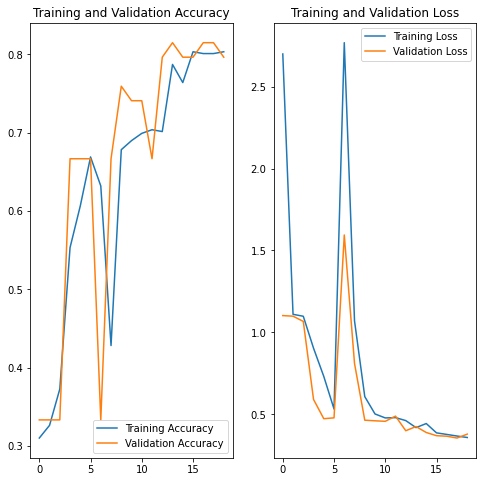

In [32]:
# Visualization
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(19)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [18]:
# Evaluation
p_pred = model.predict(X_test)
y_pred = np.where(p_pred > 0.5, 1, 0)

cr = classification_report(y_test_cat, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        18
           1       0.93      0.78      0.85        18
           2       1.00      1.00      1.00        18

   micro avg       0.92      0.91      0.92        54
   macro avg       0.93      0.91      0.91        54
weighted avg       0.93      0.91      0.91        54
 samples avg       0.91      0.91      0.91        54



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
score = model.evaluate(X_test, y_test_cat, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.39001357555389404
Test accuracy: 0.9259259104728699


In [20]:
X_test.shape


(54, 224, 224, 3)

In [62]:
print(classes[i][0])
np.argmax(classes[i][0])

0.0


0

In [9]:
predictions

array([[0., 1.]], dtype=float32)

In [8]:
dirpath = '/content/drive/MyDrive/Citra BISINDO/O/body dot (2).jpg'
name_class = ['O','S','NOTHING']

model = tf.keras.models.load_model('/content/drive/MyDrive/Model_dis_2/Model-best.h5')

img = tf.keras.utils.load_img(
    dirpath, target_size=(100, 100)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(name_class[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to S with a 73.11 percent confidence.


In [14]:
classes[0][0]

0.0

In [19]:
idX_class[0]

IndexError: ignored

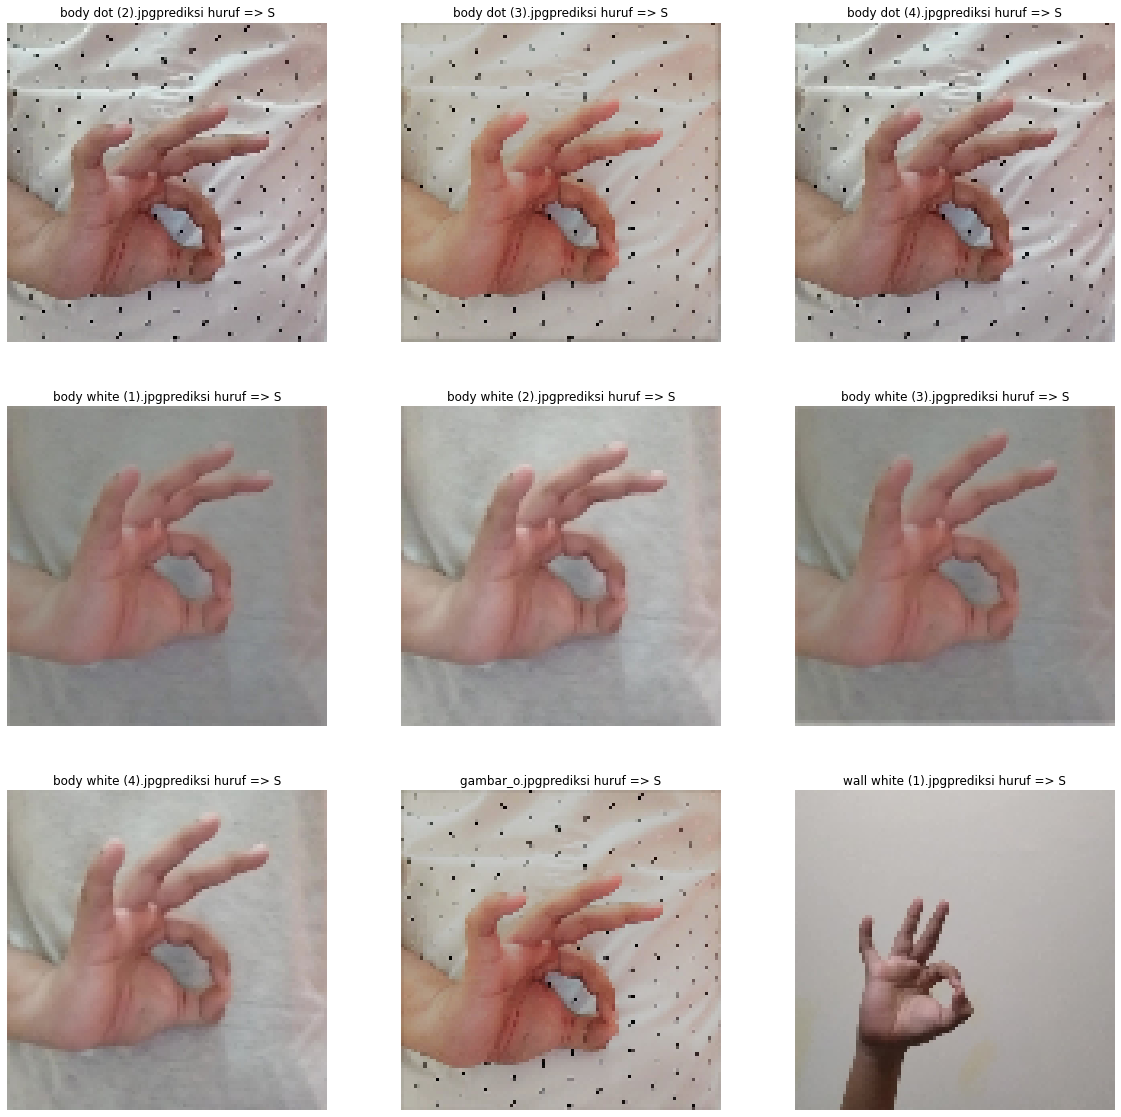

In [21]:
# Test image in folder 'test'
from keras.preprocessing import image
import numpy as np
import os
directory = '/content/drive/MyDrive/Citra BISINDO/O'
name_class = ['O','S','NOTHING']
image_name = []
images = []
collect_img = []
count_img = 9
list_file = sorted(os.listdir(directory))
model = tf.keras.models.load_model('/content/drive/MyDrive/Model_dis_2/Model-best.h5')

for img in list_file[:count_img]:
    image_name.append(img)
    img = os.path.join(directory, img)
    img = image.load_img(img, target_size=(size_img))
    img_np = image.img_to_array(img)
    img = np.expand_dims(img_np, axis=0)
    images.append(img)
    collect_img.append(img_np)

images = np.vstack(images)
classes = model.predict(images)

plt.figure(figsize=(20, 20))
for i in range(len(list_file[:count_img][:count_img])):
    idX_class = classes[i]
    ax = plt.subplot(3, 3, i + 1)

    if idX_class[0] == 1:
      # print(i+1, image_name[i],'    ', name_class[0])
      plt.imshow(collect_img[i].astype("uint8"))
      plt.title(image_name[i]+'prediksi huruf => '+name_class[0])
      plt.axis("off")

    elif idX_class[1] == 1:
      # print(i+1, image_name[i],'    ', name_class[1])
      plt.imshow(collect_img[i].astype("uint8"))
      plt.title(image_name[i]+'prediksi huruf => '+name_class[1])
      plt.axis("off")
      
    elif idX_class[2] == 1:
      # print(i+1, image_name[i],'    ', name_class[2])
      plt.imshow(collect_img[i].astype("uint8"))
      plt.title(image_name[i]+'prediksi huruf => '+name_class[2])
      plt.axis("off")

# Camera Acces

In [ ]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
import html
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io

In [ ]:
def jsob_to_image(js_object):
  # decode base64 image
  image_bytes = b64decode(js_object.split(',')[1])
  # convert bytes to numpy array
  img_array = np.frombuffer(image_bytes, dtype=np.uint8)
  # convert numpy array into OpenCV BGR 
  frame = cv2.imdecode(img_array, flags=1)

  return frame

In [ ]:
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }
      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);
      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="blue: red; font-weight: bold;">' +
          'click here to stop the video</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();
      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; 
      captureCanvas.height = 480; 
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame() {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }
      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
  
            
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame():
  data = eval_js('stream_frame()')
  return data

# Get the webcam stream and forward it to python 
video_stream()

while True:
    frame_js = video_frame()
    if not frame_js:
        break
    img = jsob_to_image(frame_js["img"])

In [ ]:
# Get the webcam stream and forward it to python 
video_stream()

while True:
    frame_js = video_frame()
    if not frame_js:
        break
    img = jsob_to_image(frame_js["img"])